Jeyavvanth.R                                                                          
21BCE2472

In [1]:
#Jeyavvanth.R
#21BCE2472
#Importing the Libraries
# Task 1: Downloading the Dataset.
# Task 2: Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<ipython-input-5-e527f9bc8274>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_depth_mm'])


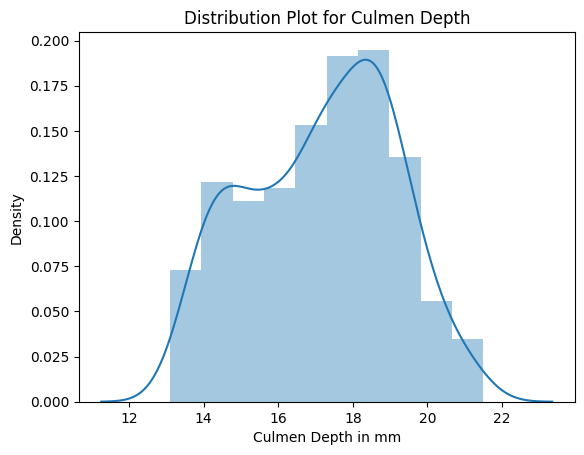

In [5]:
# Task 3: Visualizations.
# a) Univariate Analysis
sns.distplot(df['culmen_depth_mm'])
plt.title('Distribution Plot for Culmen Depth')
plt.xlabel('Culmen Depth in mm')
plt.show()

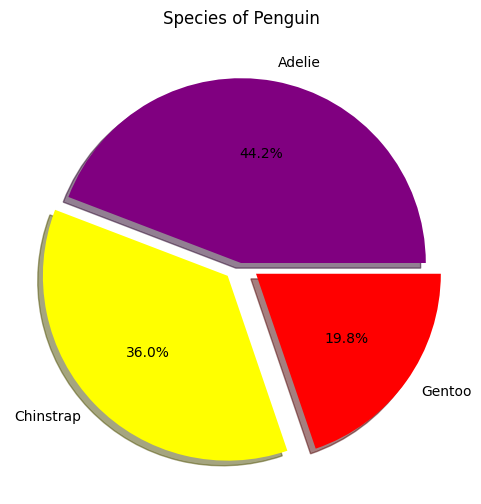

In [6]:
# a) Univariate Analysis
x = df.species.unique().tolist()

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('white')

plt.pie(df.species.value_counts(),[0,0.1,0.1],labels = x,autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow', 'red'],)
plt.title('Species of Penguin')
plt.show()

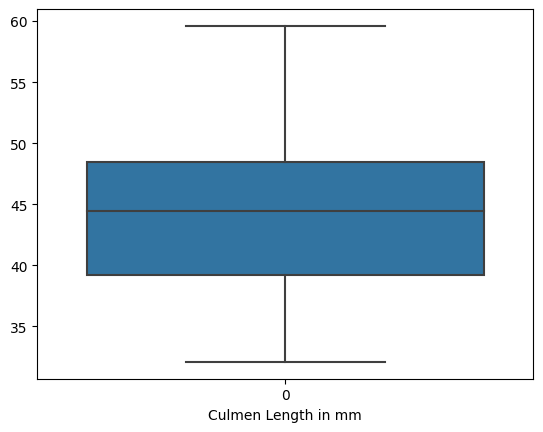

In [7]:
# a) Univariate Analysis

sns.boxplot(df.culmen_length_mm)
plt.xlabel('Culmen Length in mm')
plt.show()

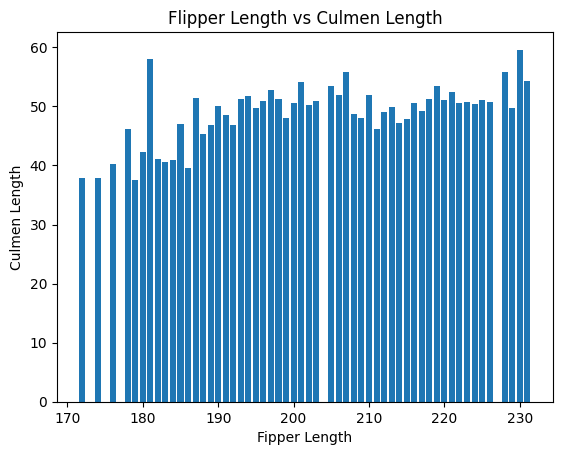

In [10]:
# Task 3: Visualizations.
# b) Bivaraiate Analysis

x= df['flipper_length_mm']
y= df['culmen_length_mm']
plt.bar(x,y)
plt.title('Flipper Length vs Culmen Length')
plt.xlabel('Fipper Length')
plt.ylabel('Culmen Length')
plt.show()

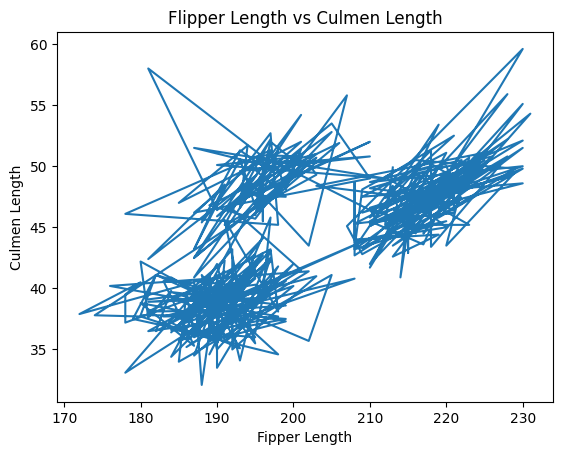

In [12]:
# b) Bivaraiate Analysis

plt.plot(x,y)
plt.title('Flipper Length vs Culmen Length')
plt.xlabel('Fipper Length')
plt.ylabel('Culmen Length')
plt.show()

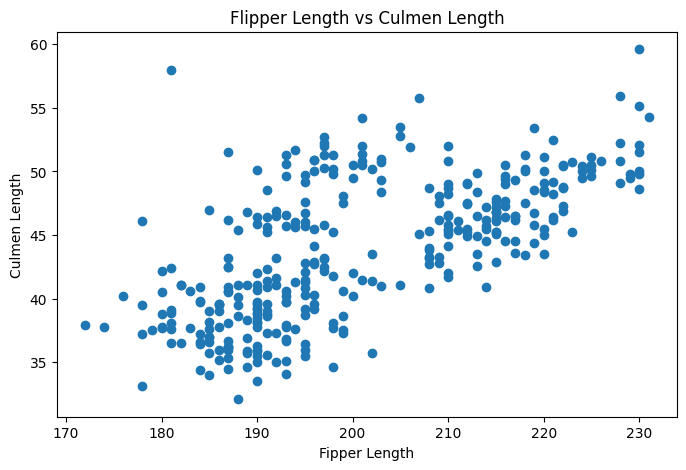

In [14]:
# b) Bivaraiate Analysis

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('Flipper Length vs Culmen Length')
plt.xlabel('Fipper Length')
plt.ylabel('Culmen Length')
plt.show()

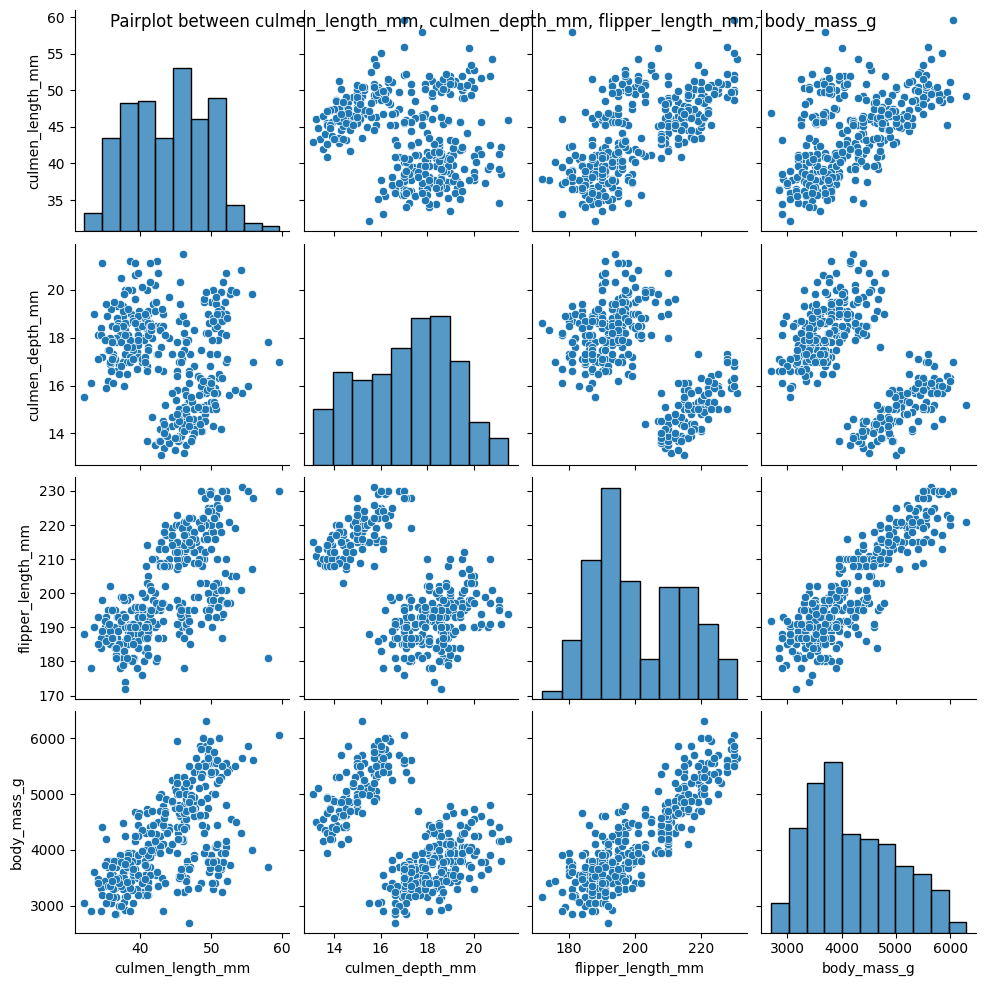

In [17]:
# c) Multivariate Analysis

num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()

<ipython-input-18-793546c52873>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)


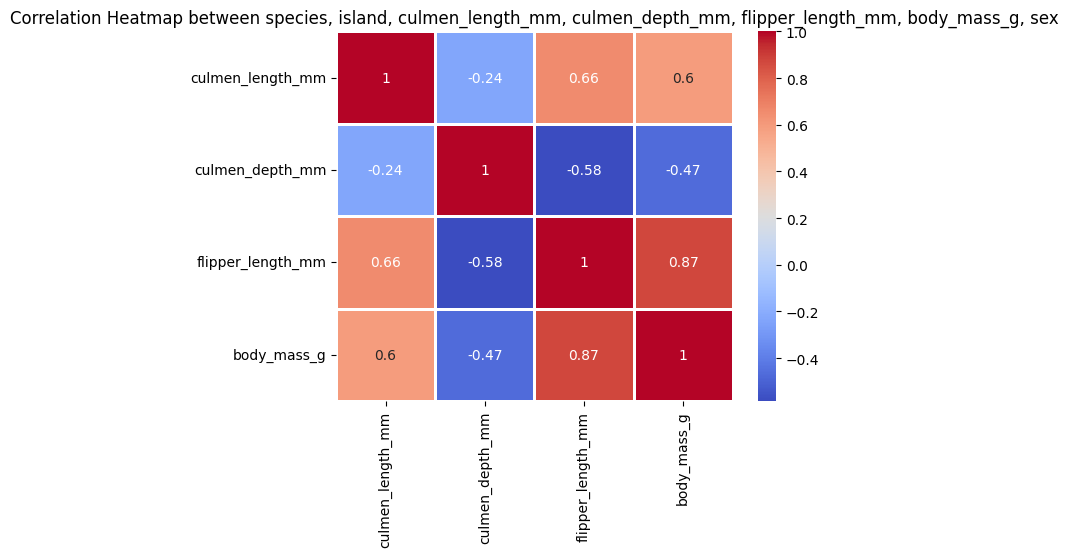

In [18]:
# c) Multivariate Analysis

l=df.columns.tolist()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

In [19]:
# Task 4. Descriptive Statistics.

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
# Task 5. Handling the Missing Values.

df.isnull().sum()

# No null values that has to be handled.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
# Handling the Missing Values.

#Numerical
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)

#Categorical
z=str(df['sex'].mode().iloc[0])
df['sex'] = df['sex'].fillna(z)
df['sex'] = df['sex'].str.replace('.',z)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<ipython-input-22-ffa5c5aeac6d>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sex'] = df['sex'].str.replace('.',z)


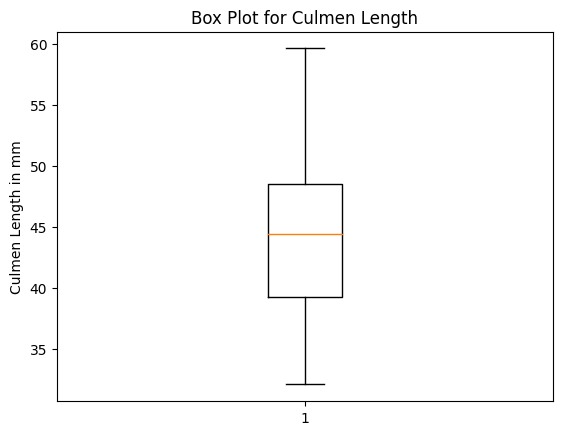

In [23]:
# Task 6. Finding the outliers and replacing them.

# Culmen Length.

plt.boxplot(df['culmen_length_mm'])
plt.title('Box Plot for Culmen Length')
plt.ylabel('Culmen Length in mm')
plt.show()

# No Outliers

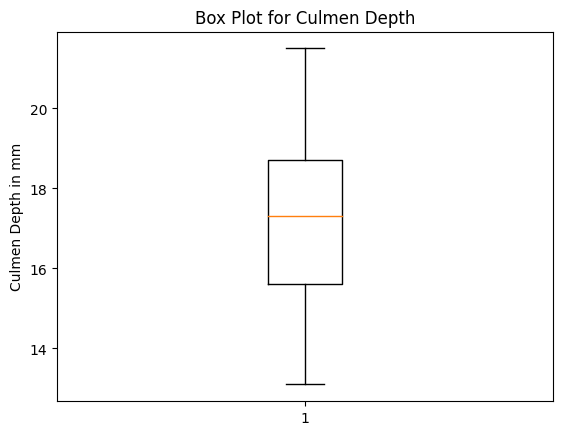

In [24]:
#Culmen Depth.

plt.boxplot(df['culmen_depth_mm'])
plt.title('Box Plot for Culmen Depth')
plt.ylabel('Culmen Depth in mm')
plt.show()

# No outliers

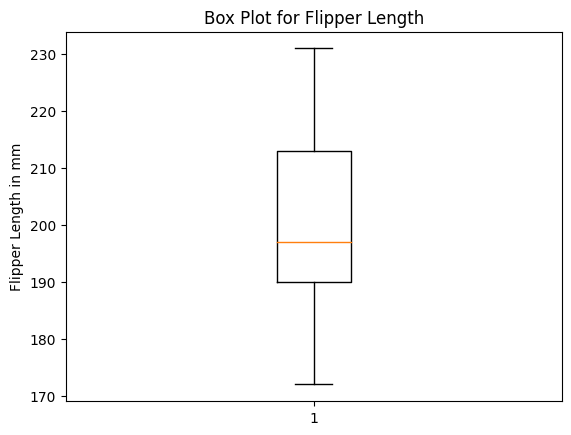

In [25]:
#Flipper Length.

plt.boxplot(df['flipper_length_mm'])
plt.title('Box Plot for Flipper Length')
plt.ylabel('Flipper Length in mm')
plt.show()

# No outliers

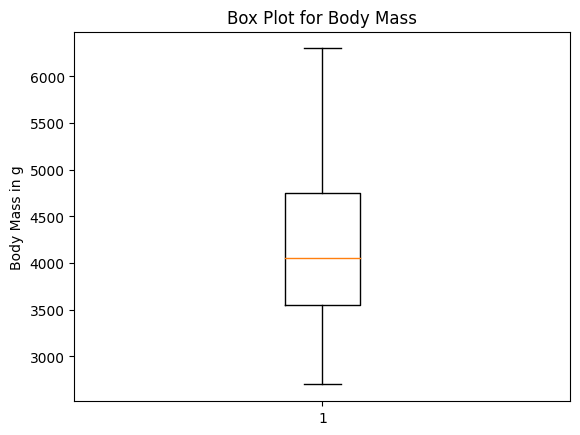

In [26]:
#Body Mass.

plt.boxplot(df['body_mass_g'])
plt.title('Box Plot for Body Mass')
plt.ylabel('Body Mass in g')
plt.show()

# No outliers

In [27]:
# Task 7  Check the Correlation of Indpendent Variables with the target
# Task 8  Encoding

le = LabelEncoder()
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


In [28]:
df.corr().species.sort_values(ascending= False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

In [29]:
# Task 9.
# Dependent Variables.

y = df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [30]:
# Independent Variables.

x=df.drop(columns =['species'],axis =1)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [31]:
# Task 10. Scaling

scale =StandardScaler()
x_scaled =pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.844076,-0.887622,0.787289,-1.420541,-0.564625,0.960098
1,1.844076,-0.814037,0.126114,-1.063485,-0.502010,-1.041561
2,1.844076,-0.666866,0.431272,-0.420786,-1.190773,-1.041561
3,1.844076,0.096581,0.075255,-0.277964,-0.188936,0.960098
4,1.844076,-1.329133,1.092447,-0.563608,-0.940314,-1.041561


In [32]:
# Task 11. Spliting into Training and Splitting Data.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=10)

In [33]:
# Task 12. Check Shape

x_train.shape

(240, 6)

In [34]:
y_train.shape

(240,)

In [35]:
x_test.shape

(104, 6)

In [36]:
y_test.shape

(104,)